# Problem set 3
     
   **Name**: Julien Neves

**Name**: Matthieu Ranger

**Date**: March 8, 2017
   
## Problem 1  

### a)
 
Since $c(s) = c(t)$, $\frac{u'(c(s))}{u'(c(t))} = 1$. We then have the closed form solution $P(t) = D \frac{1-e^{-\rho(T-t)}}{\rho} $. This gives the value of $P(0) = \frac{1-e^{-4}}{0.04} = 24.54$ when $D=1, \rho = 0.04 , T = 100$.

The limit for this value as $T \rightarrow \inf$ is $\frac{1}{0.04}=25$

### a)

By the Leibniz rule, we get $\frac{dP}{dt} = -De^{-\rho(T-t)}$ and thus the following ODE
$$
P'(t) = \rho P(t) - D
$$

#### c)

Euler's method is an iterative procedure (by recursion) to solve initial value problems. The $i^{th}$ iteration of Euler's method generates an approximate value by $x_{i+1} = x_i + hf(t_i , x_i )$

This gives us a final value problem, knowing that $P(T) = 0$. Over the interval $[0,100]$, using the values of $D$ and $\rho$ above, we can solve it numerically:


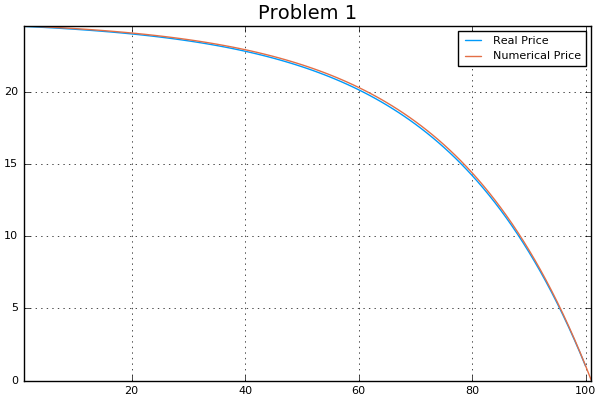

In [1]:
using Plots

# final value
rho = 0.04
T = 100
h = 1
D = 1

P(t)=D*(1-exp(-rho*(T-t)))/rho
f(x) = rho*x - D

# vector of outputs for plot
price_real = Array{Float64}(101)
price_ode = Array{Float64}(101)
price = Array{Float64}(1)

time = [0:h:99;]
price
price_real = P(time)

# Set starting value such that P(T)=0 in algorithm
price = 0

# Euler iteration
for t in time
    price = price - h * f(price)
    price_ode[T-t] = price
end

plot(price_real, title = "Problem 1", label = "Real Price")
plot!(price_ode, label = "Numerical Price")

## Problem 2  

### a)

Solving $C'(t) = \frac{- U'(C(t))}{U''(C(t))}(r - \rho)$ given the utility function $U(C) = (c^{1-\lambda} -1)/(1-\lambda)$ we get $C'(t) = 2C(r-\rho) = -C$ given the values of $\lambda , r$ and $\rho$. 

Using this, we can solve for $w''(t)$ in terms of $w'(t) , w(t) , y'(t) , y(t)$ as the equation $w''(t) = (r - 1)w'(t) + rw(t) + y'(t) + y(t)$

Replacing $y(t)$ we get the second order ODE $w''(t) = (r - 1)w'(t) + rw(t) + \frac{1}{(1+e^{-0.15t})} + \frac{0.15e^{-0.15 t}}{ (1 + e^{-0.15 t})^2)}$ with the conditions $w(0) = 0$ and $w(T) = 0$ which we can recast as the shooting method condition $w'(0) = \theta$ for some $\theta$ that solves $w(T) = 0$. 

Since $w'(0)$ simply dictates the state of $w(1)$, we can simply find the the value of $w(1) = \theta$ that gives us our second boundary condition $w(T) = 0$. 

Taking Euler iteration of this initial value problem as a function, we can find the root, eg. where $EulerIteration(\theta)$ in $[1,T]$ ends at $0$.

-

3.2501329185868872


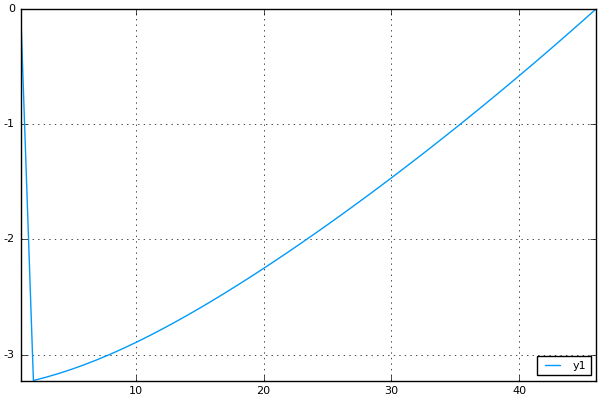

In [2]:
using Roots

# intial values
wealth = 0.0
theta = 1.0
r = 0.1
y(t) = 1/(1+exp(-0.15*t))
yprime(t) = (0.15*exp(-0.15*t))/((1+exp(-0.15*t))^2)
wealth_prime(wealth, t) = wealth + 
                         (r-1)*( (r*wealth) + y(t) + yprime(t) ) +
                         r*wealth + y(t) + yprime(t)

# vector of outputs for plot
wealth_vector = Array{Float64}(46)

function Euler_iter(wealth, start_t, end_t)  
    for t = start_t:end_t
        wealth = wealth_prime(wealth, t)
        wealth_vector[t+1] = wealth
    end
    return wealth
end

function Euler(w)
    return Euler_iter(w, 1, 45)
end

theta = -50.0
error = 500

while error > 0.005
    theta += 0.5
    error = Euler_iter(theta, 1, 45)
end

res = fzero(Euler, theta)

print(res)
plot(wealth_vector)

### b)
This can simply be done by modifying the $y(t)$ and $yprime(t)$ functions in the above code:

-3.2501329185868872


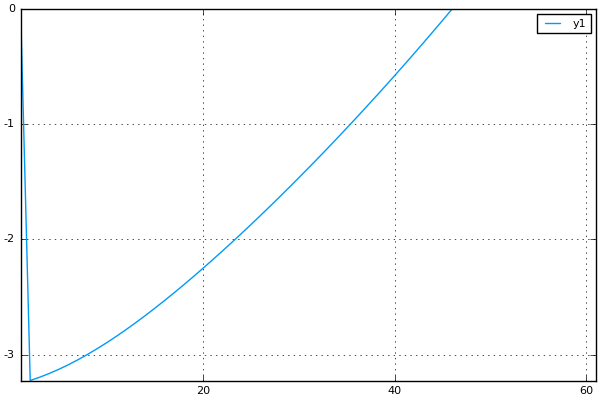

In [3]:
using Roots

# intial values
wealth = 0.0
theta = 1.0
r = 0.1

function y(t)
    if t > 45
        return 0
    end
    return 1/(1+exp(-0.15*t))
end

function yprime(t)
    if t > 45
        return 0
    end
    return (0.15*exp(-0.15*t))/((1+exp(-0.15*t))^2)
end

wealth_prime(wealth, t) = wealth + 
                         (r-1)*( (r*wealth) + y(t) + yprime(t) ) +
                         r*wealth + y(t) + yprime(t)

# vector of outputs for plot
wealth_vector = Array{Float64}(61)

function Euler_iter(wealth, start_t, end_t)  
    for t = start_t:end_t
        wealth = wealth_prime(wealth, t)
        wealth_vector[t+1] = wealth
    end
    return wealth
end

function Euler(w)
    return Euler_iter(w, 1, 60)
end

theta = -50.0
error = 500

while error > 0.005
    theta += 0.5
    error = Euler_iter(theta, 1, 60)
end

res = fzero(Euler, theta)

print(res)
plot(wealth_vector)

## Problem 3
### a)

Let $x(0)$ be known and
$$
x'(t)=f(t,x(t))
$$

Then the second order Taylor approximation of $x(t+h)$ is given by
$$
x(t+h) = x(t)+hx(t)' + \frac{h^2}{2}x(t)'' +O(h^3)\\
x(t+h) = x+ h f + \frac{h^2}{2}(f_t+f_xf) +O(h^3)
$$
where $f_x$ is derivative of $f$ with respect to x and $f_t$ is derivative of $f$ with respect to t.

We are trying to find a method where
$$
k_1 = hf(t, x)\\
k_2 = hf(t + \alpha h, x+\alpha k_1)
$$
and 
$$
x(t+h)= x(t)+a k_1 + bk_2
$$

Note that
$$
f(t + \alpha h, x+\alpha hf) = f + \alpha h(f_t+f_xf) +O(h^2)
$$

We can substitute this equation in the Taylor expansion of $x(t+h)$ and get
$$
x(t+h) = x(t)+hx(t)' + \frac{h^2}{2}x(t)'' +O(h^3)\\
x(t+h) = x+ h f + \frac{h}{2\alpha}(f(t + \alpha h, x+\alpha hf) - f) +O(h^3)\\
x(t+h) = x+ h[(1-\frac{1}{2\alpha}) f + \frac{1}{2\alpha}f(t + \alpha h, x+\alpha hf)] +O(h^3)\\
x(t+h) = x+ \frac{2\alpha-1}{2\alpha} k_1 + \frac{1}{2\alpha}k_2 +O(h^3)
$$

Then letting $\alpha$ take some value we get Runge-Kutta second-order method. For example, let $\alpha=1$ and we get
$$
x(t+h) = x+ k_2 +O(h^3)
$$
where $k_2 = hf(t + \frac{h}{2}, x+\frac{h}{2} f)$
### b)

Any) in module Main at In[2]:9 overwritten at In[3]:22.


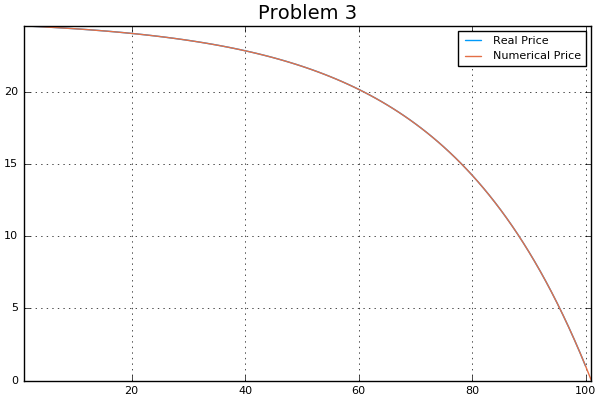

In [4]:
using Plots

# final value
rho = 0.04
T = 100
h = 1
D = 1

P(t)=D*(1-exp(-rho*(T-t)))/rho
f(x) = rho*x - D

# vector of outputs for plot
price_real = Array{Float64}(101)
price_ode = Array{Float64}(101)
price = Array{Float64}(1)

time = [0:h:99;]
price
price_real = P(time)

# Set starting value such that P(T)=0 in algorithm
price = 0

# Runge-Kutta second order with alpha = 1/2
for t in time
    price = price - h*f(price-h/2*f(price))
    price_ode[T-t] = price
end

plot(price_real, title = "Problem 3", label = "Real Price")
plot!(price_ode, label = "Numerical Price")

## Problem 4

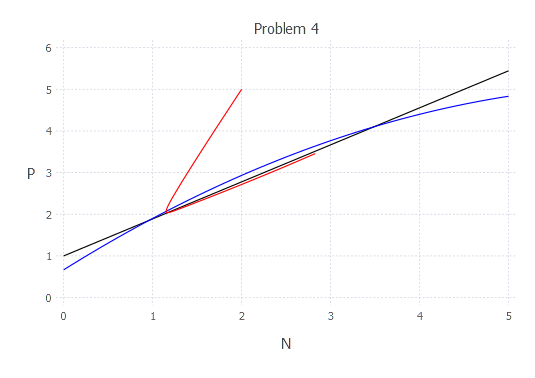

In [1]:
using ODE
using Gadfly

# Set of ode functions
function odefun(t, y)
    alpha = [.2, .4, .03]
    beta = .3
    gamma = .8
    rho = .9
    Pbar = 1.0
    
    ydot = similar(y)
    
    ydot[1] = alpha[1] + alpha[2] * y[1] - alpha[3] * y[1].^2 - beta * y[2]
    ydot[2] = gamma * y[1] - rho *(y[2] - Pbar)
    ydot
end

# Set of function nullcline function
function equifun(x)
    alpha = [.2, .4, .03]
    beta = .3
    gamma = .8
    rho = .9
    Pbar = 1.0
    
    y = similar(x)
    
    y[1] = (alpha[1] + alpha[2] * x[1] - alpha[3] * x[1].^2 )/beta
    y[2] = (gamma * x[2] + rho * Pbar)/rho
    
    return x,y
end

t = [0.0:1:40.0;]
y0 = [2.0, 5.0]

t,y = ode45(odefun, y0, t)

N = [a[1] for a in y]
P = [a[2] for a in y]

x = [[0.0:.1:5.0;], [0.0:.1:5.0;]]

x, y = equifun(x)

Gadfly.plot(layer(x = N, y = P, Geom.path, Theme(default_color = colorant"red")),
            layer(x = x[1], y = y[1], Geom.line, Theme(default_color = colorant"blue")),
            layer(x = x[2], y = y[2], Geom.line, Theme(default_color = colorant"black")),
            Guide.xlabel("N"),
            Guide.ylabel("P"),
            Guide.title("Problem 4"))

The blue line represents the population nullcline, the black line represents the ambient population nullcline and the red line represents the path of $(N,P)$ starting at $(2,5)$. Note that at first, the path will move toward the first equilibrium close to $(1,2)$, but then it shoots out and goes to the second equilibirum close to $(3.5,4)$. Hence, the former is not stable while the latter is stable. This can be easily seen by checking different starting points.